# Árvores II - Tarefa I

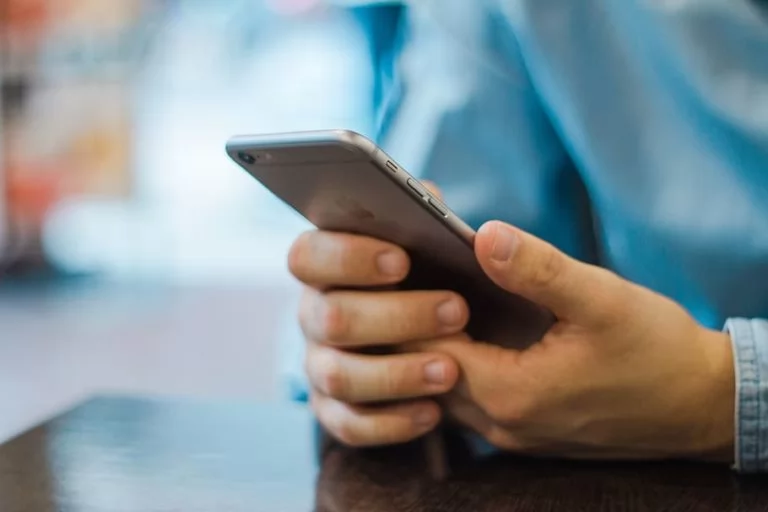  
[fonte](https://momentum.org/programs-services/manage-your-money/savings-app/pxfuel-creative-commons-zero-cc0-iphone-smartphone-cell-phone-mobile-technology-texting/)

Neste exercício vamos trabalhar com a base de dados de identificação de atividade humana com smartphones. Smartphones possuem acelerômetro e giroscópio, que registram dados de aceleração e giro nos eixos X, Y e Z, com frequencia de 50 Hz (ou seja, 50 registros por segundo). Os dados foram agrupados a medidas de 0.3 Hz, calculando-se variáveis derivadas como aceleração mínima, máxima, média etc por eixo no período agrupado de tempo, resultando em 561 variáveis que podem ser lidas nas bases disponíveis.

A base é oriunda de um experimento, em que os indivíduos realizavam uma de seis atividades corriqueiras:
- andando
- subindo escada
- descendo escada
- parado
- sentado
- deitado

O objetivo é classificar a atividade humana com base nos dados do acelerômetro e giroscópio do celular.

### 1. Carregar a base

Sua primeira atividade é carregar a base.

Ela está disponível neste link:
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones

dados https://archive.ics.uci.edu/ml/machine-learning-databases/00240/  
dataset.names https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.names  
UCI HAR Dataset.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip

Você vai encontrar os seguintes arquivos:

- **features.txt:** contém a lista com os nomes das variáveis
- **features_info.txt:** contém a descrição das variáveis
- **README.txt:** contém uma descrição do estudo e das bases
- **activity_labels:** contém o código da atividade (inteiro entre 1 e 6) e a descrição
- **subject_train.txt:** uma lista indicando que registro pertence a que indivíduo na base de treino
- **X_train.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_train.txt.
- **y_train.txt:** Possui o mesmo número de linhas que X_test. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de treino.
- **subject_test.txt:** uma lista indicando que registro pertence a que indivíduo na base de teste
- **X_test.txt:** as *features* (ou variáveis explicativas) da base de testes. Cada linha representa um registro das informações de um indivíduo em um intervalo de tempo de aproximadamente 1/0.3 segundo. As medidas estão em ordem temporal dentro do estudo, e o indivíduo que originou a medida está identificado na base subject_test.txt.
- **y_test.txt:** Possui o mesmo número de linhas que X_train. Contém um número de 1 a 6 indicando a atividade que estava sendo realizada por aquele registro na base de teste.

Carregue as bases:

1. Faça o download dos arquivos.
2. Carregue a base ```features.txt``` em uma *Series* (por exemplo usando o comando ```pd.read_csv()```.
3. Carregue a base subject_train.txt em uma *Series*
4. Carregue a base X_train.txt
    1. Faça com que as colunas deste *dataframe* tenham os nomes indicados em ```features.txt```
    2. Sem alterar a ordem dos *dataframes*, coloque o indicador do indivíduo lido em ```subject_train.txt``` como uma variável a mais neste *dataframe***
    3. Faça com que este *dataframe* tenha um índice duplo, composto pela ordem dos dados e pelo identificador do indivíduo
5. Com a mesma lógica, carregue a base X_test
    1. Certifique-se de que tenha os nomes lidos em ```features.txt```
    2. Coloque o identificador do sujeito lido em ```subject_test.txt```
    3. Defina um índice duplo composto pela ordem do registro e o identificador do registro
6. Salve as bases em arquivos CSV para facilitar a leitura deles na terefa 2 deste módulo
7. Considere que esta base é maior que a da aula, tanto em linhas quanto em colunas. Selecione apenas as três primeiras colunas da base ('tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y' e 'tBodyAcc-mean()-Z'), para efeitos desse exercício.

**OBS:** As bases já estão divididas em treino e teste, de modo que não vamos precisar da função ```train_test_split```.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
import csv
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [2]:
with open ('./Input/UCI HAR Dataset/features.txt', 'r', encoding='utf-8') as f:
    features = pd.DataFrame(csv.reader(f, delimiter=' '))
features.rename(columns={0:'A', 1:'features'}, inplace=True)
features

,A,features
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [3]:
with open ('./Input/UCI HAR Dataset/train/subject_train.txt', 'r', encoding='utf-8') as s:
    subject_train = (s.readlines())
    for index in range(len(subject_train)):
        subject_train[index] = subject_train[index].rstrip('\n')
subject_train= pd.DataFrame(subject_train)
print(subject_train.shape)
subject_train.value_counts()

(7352, 1)


25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
dtype: int64

In [4]:
with open ('./Input/UCI HAR Dataset/train/X_train.txt', 'r', encoding='utf-8') as x:
    X_train=pd.DataFrame(csv.reader(x, delimiter=' '))
X_train.shape


(7352, 934)

In [5]:
with open ('./Input/UCI HAR Dataset/train/y_train.txt', 'r', encoding='utf-8') as y:
    y_train=pd.DataFrame(csv.reader(y, delimiter=' '))
print(y_train.shape)
print(y_train.value_counts())
print(y_train.value_counts().sum())
y_train.info()

(7352, 1)
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
dtype: int64
7352
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7352 non-null   object
dtypes: object(1)
memory usage: 57.6+ KB


In [6]:
X_train.head(2)


,0,1,2,3,4,5,6,7,8,9,...,924,925,926,927,928,929,930,931,932,933
0,,,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,...,None,None,None,None,None,None,None,None,None,None
1,,,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,...,None,None,None,None,None,None,None,None,None,None


In [7]:
X_train= X_train.drop([0,1], axis=1)

In [8]:
copX1= X_train.copy()
copX1.head(1)

,2,3,4,5,6,7,8,9,10,11,...,924,925,926,927,928,929,930,931,932,933
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,None,None,None,None,None,None,None,None,None,None


In [9]:
Parte1=copX1.loc[:,0:562]
print(Parte1.shape)
Parte1

(7352, 561)


,2,3,4,5,6,7,8,9,10,11,...,553,554,555,556,557,558,559,560,561,562
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-9.1261831e-002,-4.8434650e-001,-7.8285070e-001,-9.9986502e-001,-9.9993178e-001,-9.9997295e-001,-9.9997018e-001,-9.9993012e-001,-9.9995862e-001,-9.9992899e-001
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,-9.9978419e-001,-9.9978237e-001,-9.9982986e-001,-9.9989878e-001,-9.9988283e-001,-9.9978339e-001,-9.9982832e-001,-9.9990802e-001,-9.9985638e-001,-9.9998846e-001
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,-9.9986215e-001,-9.9967443e-001,-9.9990627e-001,-9.9983136e-001,-9.9986294e-001,-9.9967567e-001,-9.9990349e-001,-9.9995441e-001,-9.9998760e-001,-9.9999008e-001
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,-9.9995017e-001,-9.9994811e-001,-9.9987685e-001,-9.9985973e-001,-9.9994839e-001,-9.9994609e-001,-9.9993054e-001,-9.9998924e-001,-9.9999236e-001,-9.9999253e-001
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,-9.9986506e-001,-9.9991831e-001,-9.9991088e-001,-9.9990769e-001,-9.9986361e-001,-9.9993255e-001,-9.9992595e-001,-9.9999271e-001,-9.9999637e-001,-9.9998842e-001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,2.9966534e-001,-5.7193414e-002,-1.8123302e-001,-1.9538652e-001,,3.9904850e-002,,7.7078081e-002,-2.8230064e-001,,...,,6.0950801e-001,,3.6060445e-001,-1.0000000e+000,-9.3548387e-001,-7.9310345e-001,-4.3477983e-001,-6.3318854e-001,-5.6872394e-001
7348,2.7385271e-001,-7.7493259e-003,-1.4746837e-001,-2.3530853e-001,,4.8162805e-003,,5.9279994e-002,-3.2255234e-001,-2.9456250e-002,...,-9.3333333e-001,-9.3548387e-001,-9.3103448e-001,-5.1656965e-001,-6.3858843e-001,-5.8501563e-001,-2.1301554e-001,-5.8763003e-001,,4.1029568e-001
7349,2.7338737e-001,-1.7010616e-002,-4.5021828e-002,-2.1821818e-001,-1.0382198e-001,,2.7453270e-001,-3.0451515e-001,-9.8913034e-002,,...,-5.4155653e-001,-4.6865488e-001,,3.5535462e-001,,6.0079895e-001,,4.0886168e-001,-9.3333333e-001,-9.3548387e-001
7350,2.8965416e-001,-1.8843044e-002,-1.5828059e-001,-2.1913944e-001,-1.1141169e-001,,2.6889320e-001,-3.1048749e-001,-6.8200325e-002,,...,4.4581662e-001,,3.0954495e-001,-9.3333333e-001,-9.3548387e-001,-7.9310345e-001,-3.6297967e-001,-7.9352822e-001,-4.7438813e-001,


In [10]:
Parte2 = (pd.concat([Parte1.T.reset_index(drop=True),features], axis=1)).set_index('features', drop=True).drop(['A'],axis=1).T
print(Parte2.shape)
Parte2.head(5)


(7352, 561)


features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,2.8858451e-001,-2.0294171e-002,-1.3290514e-001,-9.9527860e-001,-9.8311061e-001,-9.1352645e-001,-9.9511208e-001,-9.8318457e-001,-9.2352702e-001,-9.3472378e-001,...,-9.1261831e-002,-4.8434650e-001,-7.8285070e-001,-9.9986502e-001,-9.9993178e-001,-9.9997295e-001,-9.9997018e-001,-9.9993012e-001,-9.9995862e-001,-9.9992899e-001
1,2.7841883e-001,-1.6410568e-002,-1.2352019e-001,-9.9824528e-001,-9.7530022e-001,-9.6032199e-001,-9.9880719e-001,-9.7491437e-001,-9.5768622e-001,-9.4306751e-001,...,-9.9978419e-001,-9.9978237e-001,-9.9982986e-001,-9.9989878e-001,-9.9988283e-001,-9.9978339e-001,-9.9982832e-001,-9.9990802e-001,-9.9985638e-001,-9.9998846e-001
2,2.7965306e-001,-1.9467156e-002,-1.1346169e-001,-9.9537956e-001,-9.6718701e-001,-9.7894396e-001,-9.9651994e-001,-9.6366837e-001,-9.7746859e-001,-9.3869155e-001,...,-9.9986215e-001,-9.9967443e-001,-9.9990627e-001,-9.9983136e-001,-9.9986294e-001,-9.9967567e-001,-9.9990349e-001,-9.9995441e-001,-9.9998760e-001,-9.9999008e-001
3,2.7917394e-001,-2.6200646e-002,-1.2328257e-001,-9.9609149e-001,-9.8340270e-001,-9.9067510e-001,-9.9709947e-001,-9.8274984e-001,-9.8930250e-001,-9.3869155e-001,...,-9.9995017e-001,-9.9994811e-001,-9.9987685e-001,-9.9985973e-001,-9.9994839e-001,-9.9994609e-001,-9.9993054e-001,-9.9998924e-001,-9.9999236e-001,-9.9999253e-001
4,2.7662877e-001,-1.6569655e-002,-1.1536185e-001,-9.9813862e-001,-9.8081727e-001,-9.9048163e-001,-9.9832113e-001,-9.7967187e-001,-9.9044113e-001,-9.4246912e-001,...,-9.9986506e-001,-9.9991831e-001,-9.9991088e-001,-9.9990769e-001,-9.9986361e-001,-9.9993255e-001,-9.9992595e-001,-9.9999271e-001,-9.9999637e-001,-9.9998842e-001


In [11]:
Parte2.iloc[7347,4]

''

In [12]:
Parte2=(Parte2.replace('', 'NaN'))
Parte2.tail(5)

features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
7347,2.9966534e-001,-5.7193414e-002,-1.8123302e-001,-1.9538652e-001,NaN,3.9904850e-002,NaN,7.7078081e-002,-2.8230064e-001,NaN,...,NaN,6.0950801e-001,NaN,3.6060445e-001,-1.0000000e+000,-9.3548387e-001,-7.9310345e-001,-4.3477983e-001,-6.3318854e-001,-5.6872394e-001
7348,2.7385271e-001,-7.7493259e-003,-1.4746837e-001,-2.3530853e-001,NaN,4.8162805e-003,NaN,5.9279994e-002,-3.2255234e-001,-2.9456250e-002,...,-9.3333333e-001,-9.3548387e-001,-9.3103448e-001,-5.1656965e-001,-6.3858843e-001,-5.8501563e-001,-2.1301554e-001,-5.8763003e-001,NaN,4.1029568e-001
7349,2.7338737e-001,-1.7010616e-002,-4.5021828e-002,-2.1821818e-001,-1.0382198e-001,NaN,2.7453270e-001,-3.0451515e-001,-9.8913034e-002,NaN,...,-5.4155653e-001,-4.6865488e-001,NaN,3.5535462e-001,NaN,6.0079895e-001,NaN,4.0886168e-001,-9.3333333e-001,-9.3548387e-001
7350,2.8965416e-001,-1.8843044e-002,-1.5828059e-001,-2.1913944e-001,-1.1141169e-001,NaN,2.6889320e-001,-3.1048749e-001,-6.8200325e-002,NaN,...,4.4581662e-001,NaN,3.0954495e-001,-9.3333333e-001,-9.3548387e-001,-7.9310345e-001,-3.6297967e-001,-7.9352822e-001,-4.7438813e-001,NaN
7351,3.5150347e-001,-1.2423118e-002,-2.0386717e-001,-2.6927044e-001,-8.7211541e-002,NaN,1.7740393e-001,-3.7740405e-001,-3.8678063e-002,NaN,...,1.0247904e-001,-2.0237468e-001,NaN,3.7459489e-002,-3.7161644e-001,-6.9538547e-002,-4.8325332e-001,-8.5679334e-001,-9.2004355e-001,-9.2047532e-001


In [13]:
Parte2=Parte2.astype('float')
Parte2.tail(5)

features,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
7347,0.299665,-0.057193,-0.181233,-0.195387,NaN,0.039905,NaN,0.077078,-0.282301,NaN,...,NaN,0.609508,NaN,0.360604,-1.000000,-0.935484,-0.793103,-0.434780,-0.633189,-0.568724
7348,0.273853,-0.007749,-0.147468,-0.235309,NaN,0.004816,NaN,0.059280,-0.322552,-0.029456,...,-0.933333,-0.935484,-0.931034,-0.516570,-0.638588,-0.585016,-0.213016,-0.587630,NaN,0.410296
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,NaN,0.274533,-0.304515,-0.098913,NaN,...,-0.541557,-0.468655,NaN,0.355355,NaN,0.600799,NaN,0.408862,-0.933333,-0.935484
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,NaN,0.268893,-0.310487,-0.068200,NaN,...,0.445817,NaN,0.309545,-0.933333,-0.935484,-0.793103,-0.362980,-0.793528,-0.474388,NaN
7351,0.351503,-0.012423,-0.203867,-0.269270,-0.087212,NaN,0.177404,-0.377404,-0.038678,NaN,...,0.102479,-0.202375,NaN,0.037459,-0.371616,-0.069539,-0.483253,-0.856793,-0.920044,-0.920475


In [14]:
Parte2.isna().sum()

features
tBodyAcc-mean()-X                        17
tBodyAcc-mean()-Y                       951
tBodyAcc-mean()-Z                        55
tBodyAcc-std()-X                        698
tBodyAcc-std()-Y                        980
                                       ... 
angle(tBodyGyroMean,gravityMean)        469
angle(tBodyGyroJerkMean,gravityMean)    451
angle(X,gravityMean)                    443
angle(Y,gravityMean)                    407
angle(Z,gravityMean)                    385
Length: 561, dtype: int64

In [15]:
Parte2.dtypes

features
tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroMean,gravityMean)        float64
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Length: 561, dtype: object

In [16]:
Parte2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5+ MB


In [17]:
Xtrain=pd.concat([subject_train,Parte2],axis=1)
Xtrain.rename(columns={0:'Subject'}, inplace=True)
Xtrain=Xtrain.set_index(['Subject'], append=True)
Xtrain

,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.091262,-0.484347,-0.782851,-0.999865,-0.999932,-0.999973,-0.999970,-0.999930,-0.999959,-0.999929
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.999784,-0.999782,-0.999830,-0.999899,-0.999883,-0.999783,-0.999828,-0.999908,-0.999856,-0.999988
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.999862,-0.999674,-0.999906,-0.999831,-0.999863,-0.999676,-0.999903,-0.999954,-0.999988,-0.999990
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.999950,-0.999948,-0.999877,-0.999860,-0.999948,-0.999946,-0.999931,-0.999989,-0.999992,-0.999993
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.999865,-0.999918,-0.999911,-0.999908,-0.999864,-0.999933,-0.999926,-0.999993,-0.999996,-0.999988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,30,0.299665,-0.057193,-0.181233,-0.195387,NaN,0.039905,NaN,0.077078,-0.282301,NaN,...,NaN,0.609508,NaN,0.360604,-1.000000,-0.935484,-0.793103,-0.434780,-0.633189,-0.568724
7348,30,0.273853,-0.007749,-0.147468,-0.235309,NaN,0.004816,NaN,0.059280,-0.322552,-0.029456,...,-0.933333,-0.935484,-0.931034,-0.516570,-0.638588,-0.585016,-0.213016,-0.587630,NaN,0.410296
7349,30,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,NaN,0.274533,-0.304515,-0.098913,NaN,...,-0.541557,-0.468655,NaN,0.355355,NaN,0.600799,NaN,0.408862,-0.933333,-0.935484


In [18]:
Xtrain.to_csv('./output/Xtrain.csv') # Salvando X-train em csv.



In [19]:
print(features.shape)

with open ('./Input/UCI HAR Dataset/test/y_test.txt', 'r', encoding='utf-8') as y:
    y_test=pd.DataFrame(csv.reader(y, delimiter=' '))
print(y_test.shape)


with open ('./Input/UCI HAR Dataset/test/subject_test.txt', 'r', encoding='utf-8') as st:
    subject_test = (st.readlines())
    for index in range(len(subject_test)):
        subject_test[index] = subject_test[index].rstrip('\n')
subject_test= pd.DataFrame(subject_test)
print(subject_test.shape)

with open ('./Input/UCI HAR Dataset/test/X_test.txt', 'r', encoding='utf-8') as xt:
    X_test=pd.DataFrame(csv.reader(xt, delimiter=' '))
print(X_test.shape)


X_test= X_test.drop([0,1], axis=1).loc[:,0:562].T.reset_index(drop=True)
X_test = pd.concat([X_test,features],axis=1).set_index('features', drop=True).drop(['A'],axis=1).T
X_test=pd.concat([subject_test, (X_test.replace('', 'NaN')).astype('float')], axis=1)
X_test.rename(columns={0:'Subject'}, inplace=True)
X_test=X_test.set_index(['Subject'], append=True)

X_test

(561, 2)
(2947, 1)
(2947, 1)
(2947, 800)


,,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.395423,-0.698762,-0.387457,-0.786394,-0.485654,-0.786815,-0.994629,-0.990469,-0.992778,-0.995680
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.997180,-0.997515,-0.996846,-0.998916,-0.999560,-0.999471,-0.999293,-0.999210,-0.999241,-0.999714
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.999958,-0.999584,-0.999925,-0.999688,-0.999836,-0.999955,-0.999981,-0.999984,-0.999878,-0.999841
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.999850,-0.999921,-0.999957,-0.999997,-0.999419,-0.999831,-0.999865,-0.999975,-0.999420,-0.999908
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.999897,-0.999936,-0.999630,-0.999942,-0.999619,-0.999858,-0.999988,-0.999981,-0.999969,-0.999885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2942,24,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,NaN,...,-0.498637,-0.819107,NaN,0.207481,-0.069901,-0.910508,-0.947521,-0.933101,-0.934271,-0.952961
2943,24,0.363385,-0.039214,-0.105915,-0.305388,NaN,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.246639,-0.124352,-0.858301,-0.940725,-0.961456,-0.901237,-0.950143,-0.967324,-0.945644,-0.972146
2944,24,0.349966,NaN,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,NaN,0.412667,NaN,0.197919,-0.844484,-0.892850,-0.928502,-0.869329,-0.889220,-0.883661


In [20]:
X_test.isna().sum()

tBodyAcc-mean()-X                         3
tBodyAcc-mean()-Y                       385
tBodyAcc-mean()-Z                        17
tBodyAcc-std()-X                        188
tBodyAcc-std()-Y                        337
                                       ... 
angle(tBodyGyroMean,gravityMean)        190
angle(tBodyGyroJerkMean,gravityMean)    185
angle(X,gravityMean)                    171
angle(Y,gravityMean)                    161
angle(Z,gravityMean)                    175
Length: 561, dtype: int64

In [21]:
X_test.to_csv('./output/Xtest.csv') # Salvando X-test em csv.

In [22]:
Base_train = Xtrain[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']]
print(Base_train.isna().sum())
Base_train = Base_train.fillna(method='ffill')
Base_train.isna().sum()

tBodyAcc-mean()-X     17
tBodyAcc-mean()-Y    951
tBodyAcc-mean()-Z     55
dtype: int64


tBodyAcc-mean()-X    0
tBodyAcc-mean()-Y    0
tBodyAcc-mean()-Z    0
dtype: int64

In [23]:
Base_test = X_test[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y','tBodyAcc-mean()-Z']]
print(Base_test.isna().sum())
Base_test = Base_test.fillna(method='ffill')
Base_test.isna().sum()

tBodyAcc-mean()-X      3
tBodyAcc-mean()-Y    385
tBodyAcc-mean()-Z     17
dtype: int64


tBodyAcc-mean()-X    0
tBodyAcc-mean()-Y    0
tBodyAcc-mean()-Z    0
dtype: int64

### 2. Ajustar uma árvore de decisão

- 2.1 ajuste uma árvore de decisão com número mínimo de observações por folha = 20. Certifique-se de que você esteja utilizando apenas as 3 variáveis indicadas no exercício anterior.
- 2.2 Calcule os ccp_alphas. Como feito em aula, certifique-se de que todos os valores são positivos, e selecione apenas valores únicos.
- 2.3 Considere que vamos fazer uma árvore para cada valor de ```ccp_alpha```. Para ter um pouco mais de velocidade, crie uma coleção de dados com os ```ccp_alphas```, considerando apenas 1 a cada 5 valores. Dica: utilize o slicing do tipo ```array[::5]``` para isto. Caso se sinta seguro, fique à vontade para utilizar mais valores de ```ccp_alpha```.

In [24]:
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).fit(Base_train, y_train)

CPU times: user 118 ms, sys: 15.6 ms, total: 134 ms
Wall time: 144 ms


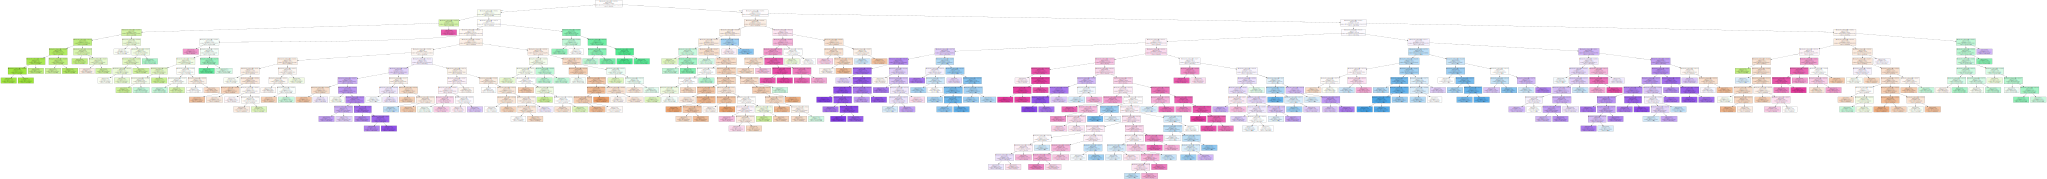

In [25]:
%%time

import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=Base_train.columns,
                                class_names=['walking', 'upstairs', 'downstairs', 'sitting', 'standing', 'laying'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph

In [26]:
clf = DecisionTreeClassifier(random_state=2360873)
path = clf.cost_complexity_pruning_path(Base_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [27]:
path

{'ccp_alphas': array([0.00000000e+00, 9.06782735e-05, 9.06782735e-05, ...,
        8.13784283e-03, 2.32974425e-02, 2.80503349e-02]),
 'impurities': array([0.00000000e+00, 1.81356547e-04, 4.53391367e-04, ...,
        7.56111491e-01, 8.02706376e-01, 8.30756711e-01])}

In [28]:
Alpha = pd.DataFrame({'alpha':ccp_alphas.tolist()})
ccp_alphas=Alpha['alpha'].unique()
ccp_alphas

array([0.00000000e+00, 9.06782735e-05, 1.02013058e-04, 1.05791319e-04,
       1.08813928e-04, 1.10514146e-04, 1.12014338e-04, 1.13347842e-04,
       1.13347842e-04, 1.14147944e-04, 1.15091655e-04, 1.15614799e-04,
       1.15614799e-04, 1.16586352e-04, 1.17126103e-04, 1.17469582e-04,
       1.17881756e-04, 1.18415157e-04, 1.18706103e-04, 1.19015234e-04,
       1.20015362e-04, 1.20323094e-04, 1.20904365e-04, 1.20904365e-04,
       1.22415669e-04, 1.22415669e-04, 1.22415669e-04, 1.23652191e-04,
       1.24609024e-04, 1.24682626e-04, 1.24682626e-04, 1.24682626e-04,
       1.25554533e-04, 1.25554533e-04, 1.25942047e-04, 1.26301881e-04,
       1.26949583e-04, 1.26949583e-04, 1.26995847e-04, 1.27516322e-04,
       1.27856366e-04, 1.28016386e-04, 1.28170252e-04, 1.28460887e-04,
       1.28858599e-04, 1.28964656e-04, 1.29216540e-04, 1.29540391e-04,
       1.29641594e-04, 1.29825313e-04, 1.29972192e-04, 1.30634903e-04,
       1.31159646e-04, 1.31244870e-04, 1.31327155e-04, 1.31483497e-04,
      

In [29]:
ccp_alphas=ccp_alphas[::5]
ccp_alphas

array([0.        , 0.00011051, 0.00011509, 0.00011747, 0.00012002,
       0.00012242, 0.00012468, 0.0001263 , 0.00012786, 0.00012896,
       0.00012997, 0.00013148, 0.0001319 , 0.00013602, 0.0001398 ,
       0.00014357, 0.00014509, 0.00014838, 0.00015053, 0.00015302,
       0.00015415, 0.0001558 , 0.00015869, 0.0001592 , 0.00016134,
       0.00016172, 0.00016247, 0.00016322, 0.00016569, 0.00016636,
       0.00016841, 0.00017002, 0.00017135, 0.00017368, 0.00017488,
       0.00017682, 0.00017787, 0.00017974, 0.00018136, 0.0001816 ,
       0.00018402, 0.0001847 , 0.0001863 , 0.00018745, 0.00018878,
       0.00018971, 0.00019042, 0.00019269, 0.00019431, 0.00019553,
       0.00019647, 0.0001982 , 0.0001994 , 0.00020032, 0.00020144,
       0.00020251, 0.00020366, 0.00020413, 0.0002064 , 0.00020726,
       0.00020904, 0.00021021, 0.00021158, 0.00021371, 0.00021449,
       0.00021687, 0.00021775, 0.00022067, 0.00022141, 0.00022268,
       0.00022346, 0.00022412, 0.00022553, 0.0002267 , 0.00022

### 3. Desempenho da árvore por ccp_alpha

- 3.1: Rode uma árvore para cada ```ccp_alpha```, salvando cada árvore em uma lista
- 3.2: Calcule a acurácia de cada árvore na base de treinamento e de teste
- 3.3: Monte um gráfico da acurácia em função do ```ccp_alpha``` na base de validação e na base de teste
- 3.4: Selecione a melhor árvore como sendo aquela que possui melhor acurácia na base de teste
- 3.5: Qual a melhor acurácia que se pode obter com estas três variáveis?

**Dica:** utilize a estrutura do notebook apresentado em aula.  
**Dica 2:** meça o tempo com a função mágica ```%%time``` na primeira linha da célula.  
**Sugestão:** caso fique confortável com o tempo de execução, faça a busca pelo melhor ```ccp_alpha``` com mais iterações.  
**Sugestão 2:** caso fique confortável com o tempo de execução, tente inserir uma ou mais variáveis adicionais e veja se consegue aumentar a acurácia.

In [30]:
%%time
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(Base_train, y_train)
    clfs.append(clf)

CPU times: user 9.37 s, sys: 14.2 ms, total: 9.39 s
Wall time: 9.39 s


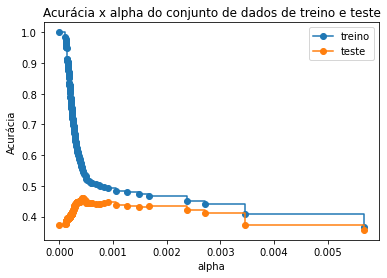

CPU times: user 1.81 s, sys: 15.9 ms, total: 1.82 s
Wall time: 1.89 s


In [31]:
%%time

train_scores = [clf.score(Base_train, y_train) for clf in clfs]
test_scores  = [clf.score(Base_test, y_test)   for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
ax.plot(ccp_alphas, train_scores, marker='o', label="treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="teste",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [32]:
%%time

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]
melhor_arvore

CPU times: user 82 µs, sys: 3 µs, total: 85 µs
Wall time: 96.1 µs


DecisionTreeClassifier(ccp_alpha=0.00044635178859799354, random_state=2360873)

/opt/anaconda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


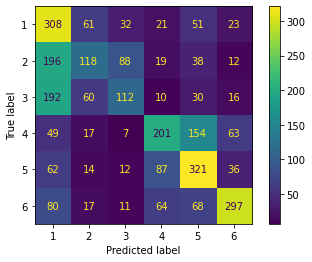

In [33]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(melhor_arvore, Base_test, y_test);

In [34]:
Predict = melhor_arvore.predict(Base_test)

In [35]:
accuracy_score(y_test, Predict)

0.4604682728198168

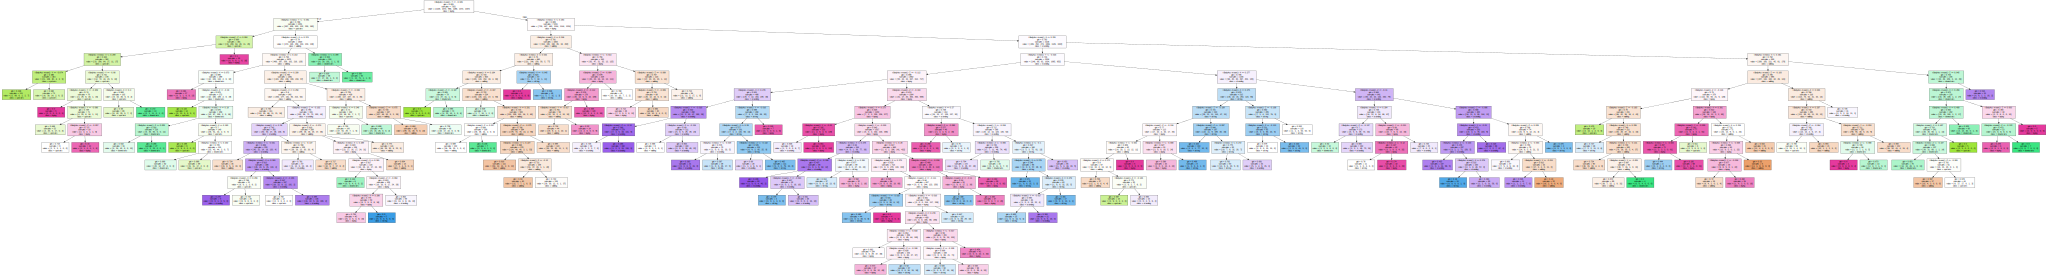

In [36]:
dot_data = export_graphviz(melhor_arvore, out_file=None, 
                                feature_names=Base_train.columns,
                                class_names=['walking', 'upstairs', 'downstairs', 'sitting', 'standing', 'laying'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph